Mats Eriksson ÖVN4 , Create a model for regression of Wage of players in FIFA 18 db

In [1]:
import findspark
findspark.init()


In [2]:
import pyspark
import random
from pyspark.sql.types import DoubleType
from pyspark.sql import functions as F

In [3]:
spark = pyspark.sql.SparkSession.builder.master("local[4]").appName("FIFA18").config(conf=pyspark.SparkConf()).getOrCreate()

In [4]:
df = spark.read.options(header=True, inferSchema=True).csv("CompleteDataset.csv")

In [5]:
#df.show(10)
df.dtypes

[('_c0', 'int'),
 ('Name', 'string'),
 ('Age', 'int'),
 ('Photo', 'string'),
 ('Nationality', 'string'),
 ('Flag', 'string'),
 ('Overall', 'int'),
 ('Potential', 'int'),
 ('Club', 'string'),
 ('Club Logo', 'string'),
 ('Value', 'string'),
 ('Wage', 'string'),
 ('Special', 'int'),
 ('Acceleration', 'string'),
 ('Aggression', 'string'),
 ('Agility', 'string'),
 ('Balance', 'string'),
 ('Ball control', 'string'),
 ('Composure', 'string'),
 ('Crossing', 'string'),
 ('Curve', 'string'),
 ('Dribbling', 'string'),
 ('Finishing', 'string'),
 ('Free kick accuracy', 'string'),
 ('GK diving', 'string'),
 ('GK handling', 'string'),
 ('GK kicking', 'string'),
 ('GK positioning', 'string'),
 ('GK reflexes', 'string'),
 ('Heading accuracy', 'string'),
 ('Interceptions', 'string'),
 ('Jumping', 'string'),
 ('Long passing', 'string'),
 ('Long shots', 'string'),
 ('Marking', 'string'),
 ('Penalties', 'string'),
 ('Positioning', 'string'),
 ('Reactions', 'string'),
 ('Short passing', 'string'),
 ('Shot p

In [6]:
# Need to convert some columns from string to double, creating help-functions
def string_to_num(x):
    x=eval(x)
    return (float)(x)

def euro_to_num(x):
    try:
        x = x.replace("€","")
        if x.endswith("M"):
            x = (float)(x.replace("M","")) * 1000000
        elif x.endswith("K"):
            x = (float)(x.replace("K","")) * 1000
        else:
            x = (float)(x)
    except:
        x = (float)-1
        
    return x

fn = F.udf(string_to_num, DoubleType())
fn_Euro = F.udf(euro_to_num, DoubleType())

def multi_string_to_num(col_names):
    def inner(df):
        for col_name in col_names:
            df = df.withColumn(col_name, fn(col_name))
        return df
    return inner

def multi_euro_to_num(col_names):
    def inner(df):
        for col_name in col_names:
            df = df.withColumn(col_name,fn_Euro(col_name))
        return df
    return inner

In [7]:
# Test

#df.select("Aggression", fn("Aggression").alias("Aggression_fixed")).show(1)
#df=df.withColumn('Aggression', fn(df.Aggression))
cols = ['Aggression','Acceleration','Agility','Balance','Ball control','Composure','Crossing','Curve','Dribbling','Finishing','Free kick accuracy','Heading accuracy','Interceptions','Jumping','Long passing','Long shots','Marking','Penalties','Positioning','Reactions','Short passing','Shot power','Sliding tackle','Sprint speed','Stamina','Standing tackle','Strength','Vision','Volleys']
df2=multi_string_to_num(cols)(df)
df3=multi_euro_to_num(["Wage","Value"])(df2)
df2.show(2)
df2.dtypes
df3.show(2)
df3.dtypes

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+--------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|          Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking

[('_c0', 'int'),
 ('Name', 'string'),
 ('Age', 'int'),
 ('Photo', 'string'),
 ('Nationality', 'string'),
 ('Flag', 'string'),
 ('Overall', 'int'),
 ('Potential', 'int'),
 ('Club', 'string'),
 ('Club Logo', 'string'),
 ('Value', 'double'),
 ('Wage', 'double'),
 ('Special', 'int'),
 ('Acceleration', 'double'),
 ('Aggression', 'double'),
 ('Agility', 'double'),
 ('Balance', 'double'),
 ('Ball control', 'double'),
 ('Composure', 'double'),
 ('Crossing', 'double'),
 ('Curve', 'double'),
 ('Dribbling', 'double'),
 ('Finishing', 'double'),
 ('Free kick accuracy', 'double'),
 ('GK diving', 'string'),
 ('GK handling', 'string'),
 ('GK kicking', 'string'),
 ('GK positioning', 'string'),
 ('GK reflexes', 'string'),
 ('Heading accuracy', 'double'),
 ('Interceptions', 'double'),
 ('Jumping', 'double'),
 ('Long passing', 'double'),
 ('Long shots', 'double'),
 ('Marking', 'double'),
 ('Penalties', 'double'),
 ('Positioning', 'double'),
 ('Reactions', 'double'),
 ('Short passing', 'double'),
 ('Shot p

17981
15746


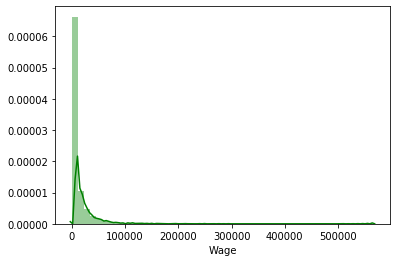

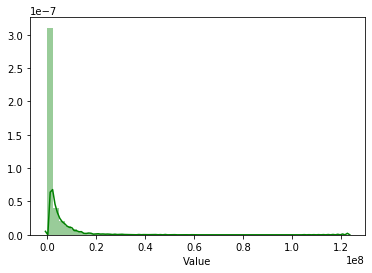

0                   1                   2  \
summary  count                mean              stddev   
_c0      17981              8990.0   5190.811930709877   
Name     17981                None                None   
Age      17981  25.144541460430453  4.6142723450050935   
Photo    17981                None                None   
...        ...                 ...                 ...   
RM       15952   60.05773570712137   9.349180368212924   
RS       15952   58.20404964894684   9.181392250811466   
RW       15952   59.35926529588766   9.978084098855218   
RWB      15952   57.69872116349047   9.142825142013779   
ST       15952   58.20404964894684   9.181392250811466   

                                                       3  \
summary                                              min   
_c0                                                    0   
Name                                            A. Abbas   
Age                                                   16   
Photo    https://cdn.sofifa.org/48/18/players/101317.png   
...                                                  ...   
RM                                                  28.0   
RS                                                  31.0   
RW                                                  26.0   
RWB                                                 31.0   
ST                                                  31.0   

                                                     4  
summary                                            max  
_c0                                              17980  
Name                                     Óscar Whalley  
Age                                                 47  
Photo    https://cdn.sofifa.org/48/18/players/9833.png  
...                                                ...  
RM                                                90.0  
RS                                                92.0  
RW                                                91.0  
RWB                                               84.0  
ST                                                92.0  

[76 rows x 5 columns]

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
nonNullDF = df3.na.drop()
print(df3.count())
print(nonNullDF.count())

pdDF = nonNullDF.toPandas()
#sns.distplot(pd.to_numeric(pdDF['Wage']), kde=True, color='g')
sns.distplot(pdDF['Wage'], kde=True, color='g')
plt.show()
sns.distplot(pdDF['Value'], kde=True, color='g')
plt.show()
df3.describe().toPandas().transpose()




In [9]:
# Instead of dropping NULL rows... impute them? Which columns has null values? are they important?
for x in df3.columns:
    df4 = df3.filter(df3[x].isNull())
    if df4.count() > 0:
        print(x + " " + str(df4.count()))
    


Club 248
CAM 2029
CB 2029
CDM 2029
CF 2029
CM 2029
LAM 2029
LB 2029
LCB 2029
LCM 2029
LDM 2029
LF 2029
LM 2029
LS 2029
LW 2029
LWB 2029
RAM 2029
RB 2029
RCB 2029
RCM 2029
RDM 2029
RF 2029
RM 2029
RS 2029
RW 2029
RWB 2029
ST 2029


In [10]:
df3.select('Wage').describe().show()



+-------+------------------+
|summary|              Wage|
+-------+------------------+
|  count|             17981|
|   mean|11546.966242144486|
| stddev|23080.000138571722|
|    min|               0.0|
|    max|          565000.0|
+-------+------------------+



In [11]:
# For now, replace null values with meanValue
from pyspark.sql.functions import avg
impute_df = df3
#print (impute_df.datatypes)
for x in impute_df.columns:
   # print ((dtype for name, dtype in impute_df.dtypes if name == x)[0])
    meanValue = df3.agg(avg(x)).first()[0]
    print (x, meanValue)
    if meanValue is not None:
        impute_df = impute_df.na.fill(meanValue, [x])


_c0 8990.0
Name None
Age 25.144541460430453
Photo None
Nationality None
Flag None
Overall 66.24798398309326
Potential 71.19081252433124
Club None
Club Logo None
Value 2385389.5778877703
Wage 11546.966242144486
Special 1594.0951003837383
Acceleration 64.6073077136978
Aggression 55.83499249207497
Agility 63.34558700850898
Balance 63.81836382848562
Ball control 58.11968188643568
Composure 57.903119959957735
Crossing 49.79150214114899
Curve 47.328124131027195
Dribbling 55.076580835326176
Finishing 45.3064345698237
Free kick accuracy 43.19259218063512
GK diving 16.664940128098024
GK handling 16.44413501169656
GK kicking 16.3441710277252
GK positioning 16.43469785575049
GK reflexes 16.783032531194294
Heading accuracy 52.34608753684444
Interceptions 46.571770201879765
Jumping 64.9051220732996
Long passing 52.471164006451254
Long shots 47.229464434681056
Marking 44.116901173460874
Penalties 48.991546632556584
Positioning 49.663700572826876
Reactions 61.91023858517324
Short passing 58.317223736

In [12]:
for x in impute_df.columns:
    df4 = impute_df.filter(impute_df[x].isNull())
    if df4.count() > 0:
        print(x + " " + str(df4.count()))


Club 248


In [13]:
# So only Club column has some Null values, erase them with string Unknown
impute_df = impute_df.fillna("Unknown")


In [14]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Oh, remove string columns
impute_noStrings_df = impute_df.drop("Name","Photo","Flag","Nationality","Club","Club Logo","GK diving","GK kicking",\
                                     "GK positioning", "GK handling", "GK reflexes","Preferred Positions")

# convert to vector column
vector_col = "corr_features"

assembler = VectorAssembler(inputCols=impute_noStrings_df.columns, outputCol=vector_col)
df_vector = assembler.transform(impute_noStrings_df).select(vector_col)
print(df_vector)
# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)

DataFrame[corr_features: vector]


In [15]:

#matrix.collect()[0]["pearson({})".format(vector_col)].values
features = impute_noStrings_df.rdd.map(lambda row: row[0:])
from pyspark.mllib.stat import Statistics

corr_mat = Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = impute_noStrings_df.columns, impute_noStrings_df.columns
#corr_df.index, corr_df.columns = impute_noStrings_df.columns
#print(corr_df.to_string())
#corr_pd_df = pd.DataFrame(matrix, index=impute_noStrings_df.columns, columns = impute_noStrings_df.columns)
#corr_pd_df

In [16]:
# Plot a heatmap of correlation matrix
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

In [75]:
cor_target = abs(corr_df['Wage'])
# Select features with high correlation
relevant_features = cor_target[cor_target>0.4]
relevant_features
#wage_col = corr_df.columns.str.match('Wage')
#corr_df.corr().loc[~wage_col, wage_col].style.background_gradient(cmap='coolwarm')

_c0          0.518905
Overall      0.593789
Potential    0.519062
Value        0.850510
Wage         1.000000
Reactions    0.501819
CM           0.443236
LCM          0.443236
LS           0.408247
RCM          0.443236
RS           0.408247
ST           0.408247
Name: Wage, dtype: float64

In [101]:
# It can be a good idea to check if they are highly correlated with eachother
pdf = impute_noStrings_df.toPandas()
#print(relevant_features.index)
pdf[relevant_features.index].corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#pdf[["Overall","Potential","Value","Reactions","CM","LCM","RCM","RS","ST"]].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


In [19]:
# KNIME project, choose
pdf[["Wage","Overall","Potential","Value","Jumping","Composure"]].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

Based on above for features for selection, I think Value is a good feature, Overall and Reactions are too similar,
I will go for using Overall instead of both Overall and reactions because Overall has a higher correlation with Wage.
Also, CM,LCM and RCM follows eachother. I will only use CM. Likewise for RS and ST, I will go for RS.
The following features will be used.
Overall, Potential, Value, CM,RS

In [106]:
# Why not try a wrapper method
import statsmodels.api as sm
X2 = impute_noStrings_df.toPandas()
# Normalize?
# Smart normalize
Y = X2.pop("Wage")
std_scale = preprocessing.StandardScaler().fit(X)

X = std_scale.transform(X2)
# Back to dataframe
X = pd.DataFrame(X, index=X2.index, columns=X2.columns)

# Backward elimination
cols = list(X.columns)
pmax = 1
while (len(cols) > 0):
    p=[]
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)    
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

f:\Anaconda3\envs\py37_jup_dl\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['Age', 'Potential', 'Value', 'Special', 'Free kick accuracy', 'Heading accuracy', 'Jumping', 'Penalties', 'Reactions', 'Shot power', 'Sliding tackle', 'CB', 'CDM', 'ID', 'LCB', 'LDM', 'LW', 'RCB', 'RDM', 'RW']


In [176]:
# Use Keras with Sklearn for training a model
import numpy as np
from sklearn import preprocessing

# Choose some data for training, validating and test
# Try with selected features above
# Oh.. drop ID, should not be in there.. and add Wage
selected_features_BE = ['Age', 'Potential', 'Value', 'Special', 'Free kick accuracy', 'Heading accuracy', 'Jumping', 'Penalties', 'Reactions', 'Shot power', 'Sliding tackle', 'CB', 'CDM', 'LCB', 'LDM', 'LW', 'RCB', 'RDM', 'RW', 'Wage']
#cols = selected_features_BE

# Cols suggested from Filter method
cols = ['Wage','Overall','Potential','Value','CM','RS','Reactions']

input_df = impute_noStrings_df.select(*cols)

train, validate, test = input_df.randomSplit([0.8, 0.1, 0.1], seed=2020)
train_pd = train.toPandas()
train_pd = train_pd.apply(lambda x:pd.Series(x))
# Float32 when training on GPU
train_pd = train_pd.astype('float32')
train_labels = np.asarray(train_pd.pop("Wage"))
#train_labels = np.asarray(train_pd["Wage"])
#norm_labels =  np.amax(train_labels, axis=0)
norm_labels = float(1000)
labels = train_labels / norm_labels
labels = labels.astype('float32')


# Normalize training data
std_scale = preprocessing.StandardScaler().fit(train_pd)
training_input_norm = std_scale.transform(train_pd)
#print(training_input_norm.shape)
#print(training_input_norm)
# Numpy-array to dataframe, strange
#training_norm_col = pd.DataFrame(training_input_norm, index=train_pd.index, columns=train_pd.columns)
#train_pd.update(training_norm_col)
#train_pd = np.asarray(train_pd)
#print(train_pd.shape)
#print(train_pd)
#print(labels)

x_train = training_input_norm
y_train = labels
print(x_train.shape)

# Prepare validation data too
validate_pd = validate.toPandas()
validate_pd = validate_pd.apply(lambda x:pd.Series(x))
validate_pd = validate_pd.astype('float32')
validate_labels = np.asarray(validate_pd.pop("Wage"))
validate_labels = validate_labels / norm_labels
validate_labels = validate_labels.astype('float32')
# Use same scaling
validate_input_norm = std_scale.transform(validate_pd)
x_validate = validate_input_norm
y_validate = validate_labels



(14384, 6)


In [190]:
# Create a DL model with Keras 
from tensorflow.python.keras import backend as k
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import SGD

model = Sequential()
model.add(Dense(6, activation='relu', input_dim=train_pd.shape[1]))
model.add(Dense(24, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(192, activation='relu'))
model.add(Dense(384, activation='relu'))
model.add(Dense(768, activation='relu'))
model.add(Dense(384, activation='relu'))
model.add(Dense(192, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='linear'))
#model.compile(loss='mean_squared_logarithmic_error', optimizer='sgd', metrics=['mse'])
model.compile(loss='mean_squared_error', optimizer='adam')
#opt = SGD(lr=0.01, momentum=0.9)
#model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['mse'])
model.summary()
model.fit(x_train, y_train, validation_data=(x_validate, y_validate), epochs=400, batch_size=50, shuffle=True, verbose=1)


Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_190 (Dense)            (None, 24)                168       
_________________________________________________________________
dense_191 (Dense)            (None, 48)                1200      
_________________________________________________________________
dense_192 (Dense)            (None, 96)                4704      
_________________________________________________________________
dense_193 (Dense)            (None, 192)               18624     
_________________________________________________________________
dense_194 (Dense)            (None, 384)               74112     
_________________________________________________________________
dense_195 (Dense)            (None, 768)             

14384/14384 [==============================] - 1s 69us/sample - loss: 125.8518 - val_loss: 140.5868
Epoch 126/400
14384/14384 [==============================] - 1s 70us/sample - loss: 126.5862 - val_loss: 112.2070
Epoch 127/400
14384/14384 [==============================] - 1s 69us/sample - loss: 122.0606 - val_loss: 111.2837
Epoch 128/400
14384/14384 [==============================] - 1s 69us/sample - loss: 124.5984 - val_loss: 114.7414
Epoch 129/400
14384/14384 [==============================] - 1s 69us/sample - loss: 117.9923 - val_loss: 108.0117
Epoch 130/400
14384/14384 [==============================] - 1s 69us/sample - loss: 121.6090 - val_loss: 116.7770
Epoch 131/400
14384/14384 [==============================] - 1s 69us/sample - loss: 122.2103 - val_loss: 119.3883
Epoch 132/400
14384/14384 [==============================] - 1s 69us/sample - loss: 116.4899 - val_loss: 115.4824
Epoch 133/400
14384/14384 [==============================] - 1s 69us/sample - loss: 126.7753 - val_los

Epoch 197/400
14384/14384 [==============================] - 1s 69us/sample - loss: 109.3053 - val_loss: 141.3900
Epoch 198/400
14384/14384 [==============================] - 1s 68us/sample - loss: 146.3118 - val_loss: 143.8685
Epoch 199/400
14384/14384 [==============================] - 1s 69us/sample - loss: 119.2246 - val_loss: 112.5506
Epoch 200/400
14384/14384 [==============================] - 1s 69us/sample - loss: 113.9039 - val_loss: 123.4678
Epoch 201/400
14384/14384 [==============================] - 1s 69us/sample - loss: 108.0661 - val_loss: 133.5793
Epoch 202/400
14384/14384 [==============================] - 1s 69us/sample - loss: 105.3521 - val_loss: 113.9786
Epoch 203/400
14384/14384 [==============================] - 1s 70us/sample - loss: 110.1309 - val_loss: 112.5212
Epoch 204/400
14384/14384 [==============================] - 1s 69us/sample - loss: 115.3833 - val_loss: 112.4741
Epoch 205/400
14384/14384 [==============================] - 1s 69us/sample - loss: 118.

Epoch 269/400
14384/14384 [==============================] - 1s 69us/sample - loss: 108.1639 - val_loss: 113.3194
Epoch 270/400
14384/14384 [==============================] - 1s 70us/sample - loss: 102.9860 - val_loss: 138.1812
Epoch 271/400
14384/14384 [==============================] - 1s 72us/sample - loss: 109.6718 - val_loss: 111.7726
Epoch 272/400
14384/14384 [==============================] - 1s 70us/sample - loss: 102.1745 - val_loss: 108.8837
Epoch 273/400
14384/14384 [==============================] - 1s 74us/sample - loss: 108.8106 - val_loss: 117.7178
Epoch 274/400
14384/14384 [==============================] - 1s 74us/sample - loss: 103.7253 - val_loss: 133.4572
Epoch 275/400
14384/14384 [==============================] - 1s 72us/sample - loss: 109.9892 - val_loss: 154.9752
Epoch 276/400
14384/14384 [==============================] - 1s 73us/sample - loss: 105.8189 - val_loss: 113.1299
Epoch 277/400
14384/14384 [==============================] - 1s 70us/sample - loss: 100.

14384/14384 [==============================] - 1s 70us/sample - loss: 100.7837 - val_loss: 164.4422
Epoch 342/400
14384/14384 [==============================] - 1s 69us/sample - loss: 96.6372 - val_loss: 128.8308
Epoch 343/400
14384/14384 [==============================] - 1s 69us/sample - loss: 95.2384 - val_loss: 135.2034
Epoch 344/400
14384/14384 [==============================] - 1s 69us/sample - loss: 98.9474 - val_loss: 122.4440
Epoch 345/400
14384/14384 [==============================] - 1s 69us/sample - loss: 96.6850 - val_loss: 128.4699
Epoch 346/400
14384/14384 [==============================] - 1s 69us/sample - loss: 96.2957 - val_loss: 118.7105
Epoch 347/400
14384/14384 [==============================] - 1s 69us/sample - loss: 97.2139 - val_loss: 116.0258
Epoch 348/400
14384/14384 [==============================] - 1s 68us/sample - loss: 106.6993 - val_loss: 125.2409
Epoch 349/400
14384/14384 [==============================] - 1s 69us/sample - loss: 101.0257 - val_loss: 114

In [191]:
# Try to predict some =)
from sklearn import metrics
test_pd = test.toPandas()
test_pd = test_pd.apply(lambda x:pd.Series(x))
test_pd = test_pd.astype('float32')
output_table = test_pd
test_labels = test_pd.pop("Wage")
#test_labels = test_pd["Wage"]
test_input_norm = std_scale.transform(test_pd)
test_input_norm = np.asarray(test_input_norm)

predictions = model.predict(test_input_norm,  verbose=2)
output_table['Predictions'] = predictions
output_table['Predictions_scaled'] = predictions * norm_labels
output_table['Labels'] = test_labels
#print(output_table.tail(100))
# Measure RMSE
score = np.sqrt(metrics.mean_squared_error(predictions * norm_labels, test_labels))
print("Final score RMSE: {}".format(score))

1800/1 - 0s
Final score RMSE: 11845.099609375


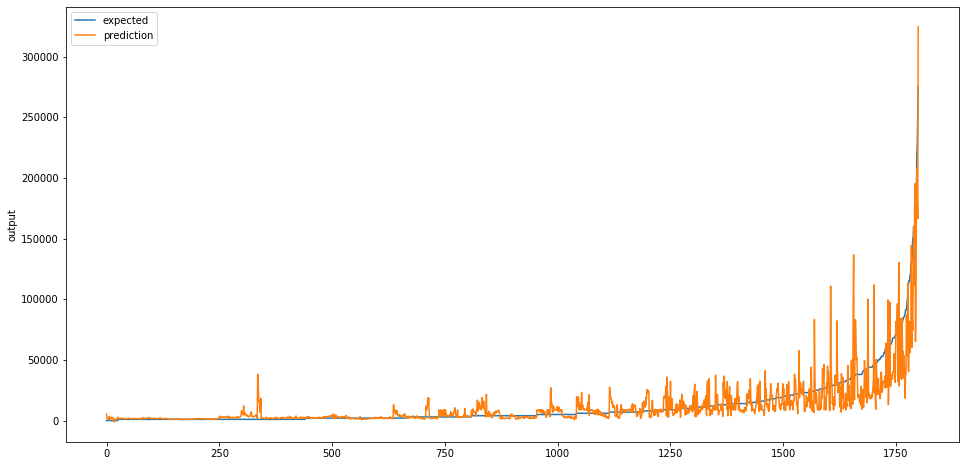

In [192]:
# Regression chart
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
plt.figure(figsize=(16,8))
chart_regression(output_table['Predictions_scaled'], test_labels)
#output_table.to_csv(r'export_dataframe.csv')